In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib inline

In [2]:
data=pd.read_excel(r"N:\Planning - New File Structure\Performance\RidershipAutomation.xlsx")
df=pd.DataFrame(data)

In [3]:
df.set_index(['Stat','Service','Route','Area'],inplace=True)

In [4]:
df.columns=pd.to_datetime(df.columns)

In [5]:
UPT_FR_18=df.loc[['UPT','FR'],datetime.date(year=2017,month=10,day=1):datetime.date(year=2018,month=9,day=1)]
UPT_FR_17=df.loc[['UPT','FR'],datetime.date(year=2016,month=10,day=1):datetime.date(year=2017,month=9,day=1)]

In [6]:
UPT_FR_17_Total=UPT_FR_17.sum(axis=0).sum()
UPT_FR_18_Total=UPT_FR_18.sum(axis=0).sum()

In [7]:
YearOverYearRidership=UPT_FR_18_Total/UPT_FR_17_Total
YearOverYearRidership

1.1031815664227351

In [8]:
ring_data=pd.DataFrame([UPT_FR_18_Total,UPT_FR_17_Total]).T
ring_data.columns=[2018,2017]
ring_data

,2018,2017
0,1800560.0,1632152.0


In [9]:
def calculate_rings(df):
  if df.iloc[0,0] < df.iloc[0,1]:
    rings=[[df.iloc[0,0],df.iloc[0,1]-df.iloc[0,0]],[0,0]]
  elif df.iloc[0,0] / df.iloc[0,1] < 2:
    rings=[[df.iloc[0,0],0],[df.iloc[0,0] % df.iloc[0,1], df.iloc[0,1]-df.iloc[0,0] % df.iloc[0,1]]]
  else:
    rings = [[0,0],[0,0]]
  return rings

def horizontal_aligner(df):
  metric = 1.0 * df.iloc[0,0] % df.iloc[0,1] / df.iloc[0,1]
  if metric in (0, 0.5):
    align = 'center'
  elif metric < 0.5:
    align = 'left'
  else:
    align = 'right'
  return align

def vertical_aligner(df):
  metric = 1.0 * df.iloc[0,0] % df.iloc[0,1] / df.iloc[0,1]
  if metric < 0.25:
    align = 'bottom'
  elif metric < 0.75:
    align = 'top'
  elif metric > 0.75:
    align = 'bottom'
  else:
    align = 'center'
  return align

def add_center_label(df):
    percent = str(round(1.0*df.iloc[0, 0]/df.iloc[0, 1]*100,1)) + '%'
    return plt.text(0,
           0.2,
           percent,
           horizontalalignment='center',
           verticalalignment='center',
           fontsize = 40,
           family = 'sans-serif')

def get_currency_label(num):
  currency = ''
  if num < 10**3:
    currency = str(num)
  elif num < 10**6:
      currency = str(round(1.0*num/10**3,1)) + 'K'
  elif df.iloc[0,0] < 10**9:
    currency = str(round(num/10**6,1)) + 'M'
  else:
    currency = str(round(num/10**9,1)) + 'B'

  return currency

def add_current_label(df):
  currency = 'FY18: '+ get_currency_label(df.iloc[0,0])
  print('vertical: ' + vertical_aligner(df))
  print('horizontal: ' + horizontal_aligner(df))
  return plt.text(1.5 * np.cos(0.5 *np.pi - 2 * np.pi * (float(df.iloc[0,0]) % df.iloc[0,1] /df.iloc[0,1])),
           1.5 * np.sin(0.5 *np.pi - 2 * np.pi * (float(df.iloc[0,0]) % df.iloc[0,1] / df.iloc[0,1])),
                  currency,
                  horizontalalignment=horizontal_aligner(df),
                  verticalalignment=vertical_aligner(df),
                  fontsize = 20,
                  family = 'sans-serif')

def add_sub_center_label(df):
    amount = 'FY17: ' + get_currency_label(df.iloc[0,1])
    return plt.text(0,
            -.1,
            amount,
            horizontalalignment='center',
            verticalalignment='top',
            fontsize = 22,family = 'sans-serif')

def create_radial_chart(df, color_theme = 'Purple'):

  # base styling logic
  color = plt.get_cmap(color_theme + 's')
  ring_width = 0.3
  outer_radius = 1.5
  inner_radius = outer_radius - ring_width

  # set up plot
  ring_arrays = calculate_rings(df)
  fig, ax = plt.subplots()

  if df.iloc[0, 0] > df.iloc[0, 1]:
    ring_to_label = 0
    outer_edge_color = None
    inner_edge_color = 'white'
  else:
    ring_to_label = 1
    outer_edge_color, inner_edge_color = ['white', None]

  # plot logic
  outer_ring, _ = ax.pie(ring_arrays[0],radius=1.5,
                    colors=[color(0.9), color(0.15)],
                    startangle = 90,
                    counterclock = False)
  plt.setp( outer_ring, width=ring_width, edgecolor=outer_edge_color)

  inner_ring, _ = ax.pie(ring_arrays[1],
                         radius=inner_radius,
                         colors=[color(0.55), color(0.05)],
                         startangle = 90,
                         counterclock = False)
  plt.setp(inner_ring, width=ring_width, edgecolor=inner_edge_color)

    # add labels and format plots
  add_center_label(df)
  add_current_label(df)
  add_sub_center_label(df)
  ax.axis('equal')
  plt.margins(0,0)
  plt.autoscale('enable')

  return plt


vertical: bottom
horizontal: left


<module 'matplotlib.pyplot' from 'C:\\Users\\bparker\\AppData\\Local\\conda\\conda\\envs\\mappingPy3\\lib\\site-packages\\matplotlib\\pyplot.py'>

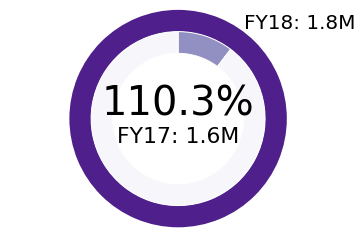

In [10]:
create_radial_chart(ring_data)

In [11]:
by_route18=df.loc[:,datetime.date(year=2017,month=10,day=1):datetime.date(year=2018,month=9,day=1)].groupby('Route').sum()
by_route17=df.loc[:,datetime.date(year=2016,month=10,day=1):datetime.date(year=2017,month=9,day=1)].groupby('Route').sum()

In [12]:
by_route18=by_route18.sum(axis=1)
by_route17=by_route17.sum(axis=1)

In [13]:
ring_data_routes=pd.DataFrame([by_route18,by_route17]).T
ring_data_routes.columns=[2018,2017]
ring_data_routes

,2018,2017
Route,,
1 Parkcenter,77969.0316,77955.0793
10 Hill Road - Maple Grove,50350.0757,54050.2547
10X,2343.2500,1953.2300
11 Garden City,15852.6713,19250.7767
12 Maple Grove,43127.0204,33612.7816
14 Hyde Park,20809.4350,21016.1784
16 VA Shuttle,13164.7297,15162.2089
17 Warm Springs,23181.0603,23745.4986
18 Harris Ranch,6885.8082,7388.5373


In [14]:
for row in ring_data_routes:
    n=1
    dfr=ring_data_routes[n,:]
    n=n+1
    create_radial_chart(dfr)

TypeError: unhashable type: 'slice'

vertical: bottom
horizontal: left
vertical: bottom
horizontal: left
vertical: bottom
horizontal: right
vertical: bottom
horizontal: left
vertical: bottom
horizontal: right
vertical: top
horizontal: left
vertical: bottom
horizontal: right
vertical: bottom
horizontal: right
vertical: bottom
horizontal: right
vertical: bottom
horizontal: right
vertical: bottom
horizontal: left
vertical: bottom
horizontal: left
vertical: bottom
horizontal: right
vertical: bottom
horizontal: right
vertical: bottom
horizontal: right
vertical: top
horizontal: left
vertical: bottom
horizontal: left
vertical: top
horizontal: right
vertical: bottom
horizontal: right
vertical: bottom
horizontal: right
vertical: top
horizontal: right
vertical: bottom
horizontal: right
vertical: top
horizontal: left
vertical: bottom
horizontal: right
vertical: top
horizontal: right
vertical: bottom
horizontal: right
vertical: top
horizontal: right
vertical: bottom
horizontal: right
vertical: bottom
horizontal: left
vertical: bottom

C:\Users\bparker\AppData\Local\conda\conda\envs\mappingPy3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


vertical: bottom
horizontal: left
vertical: bottom
horizontal: left
vertical: bottom
horizontal: right
vertical: bottom
horizontal: left
vertical: bottom
horizontal: left
vertical: bottom
horizontal: left
vertical: bottom
horizontal: left
vertical: top
horizontal: left


Route
1 Parkcenter                     <module 'matplotlib.pyplot' from 'C:\\Users\\b...
10 Hill Road - Maple Grove       <module 'matplotlib.pyplot' from 'C:\\Users\\b...
10X                              <module 'matplotlib.pyplot' from 'C:\\Users\\b...
11 Garden City                   <module 'matplotlib.pyplot' from 'C:\\Users\\b...
12 Maple Grove                   <module 'matplotlib.pyplot' from 'C:\\Users\\b...
14 Hyde Park                     <module 'matplotlib.pyplot' from 'C:\\Users\\b...
16 VA Shuttle                    <module 'matplotlib.pyplot' from 'C:\\Users\\b...
17 Warm Springs                  <module 'matplotlib.pyplot' from 'C:\\Users\\b...
18 Harris Ranch                  <module 'matplotlib.pyplot' from 'C:\\Users\\b...
2 Broadway                       <module 'matplotlib.pyplot' from 'C:\\Users\\b...
28 Overland Victory              <module 'matplotlib.pyplot' from 'C:\\Users\\b...
29 Overland                      <module 'matplotlib.pyplot' from 'C:\\Users\\b..

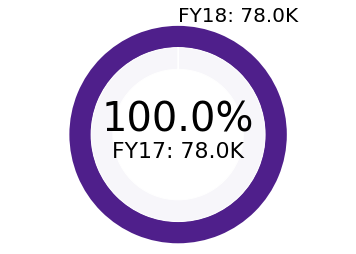

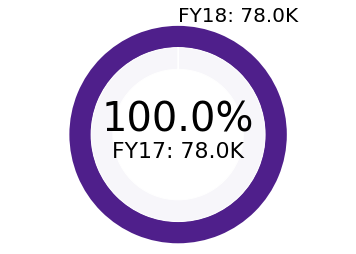

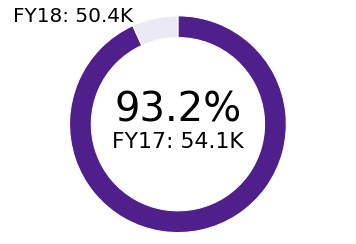

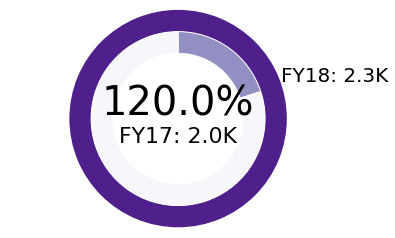

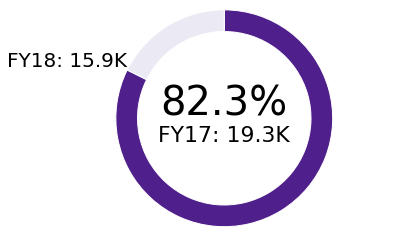

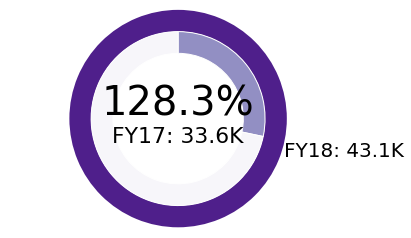

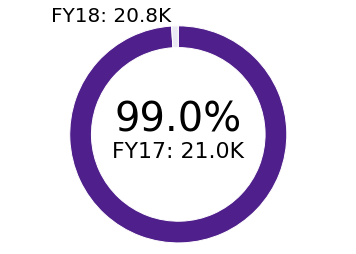

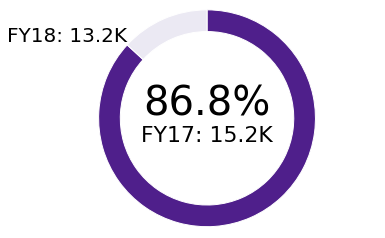

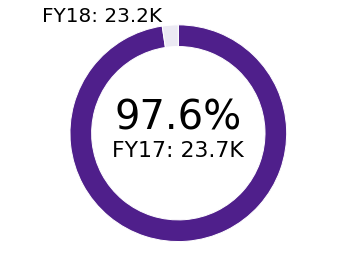

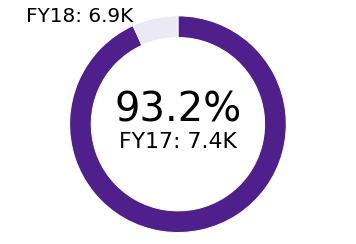

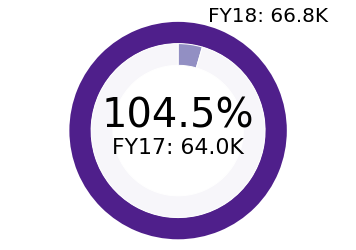

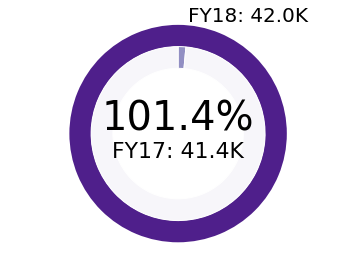

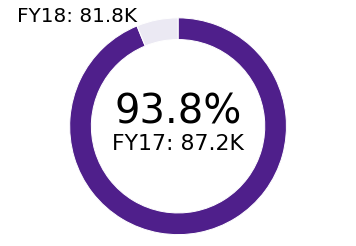

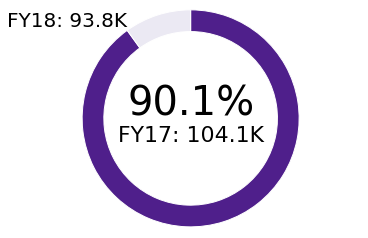

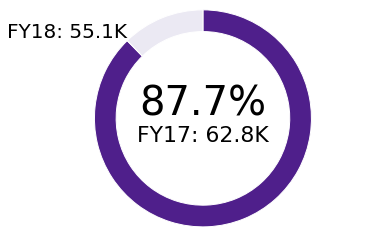

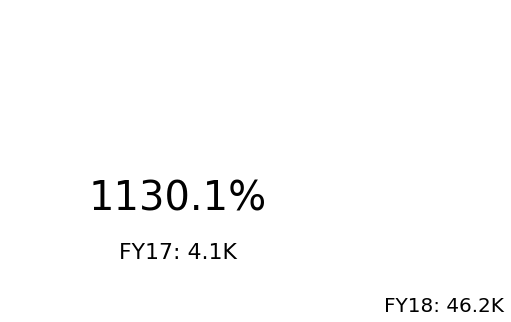

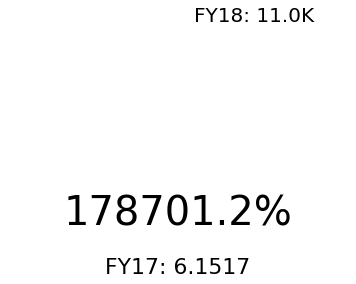

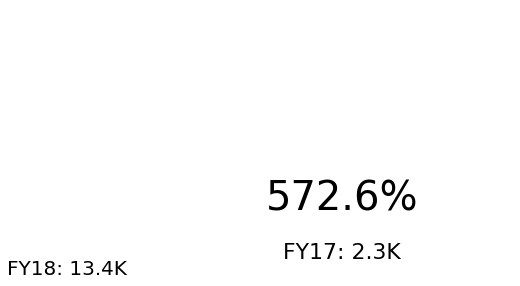

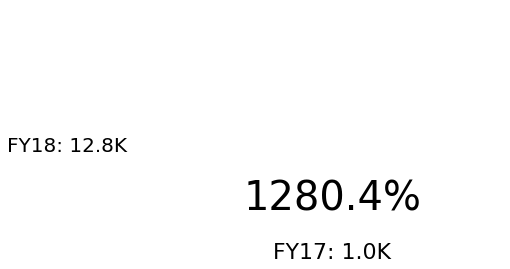

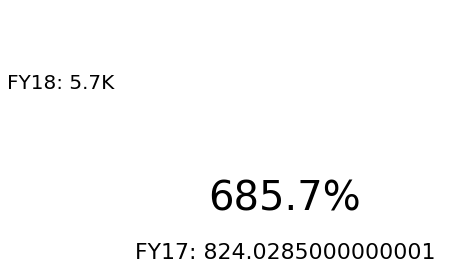

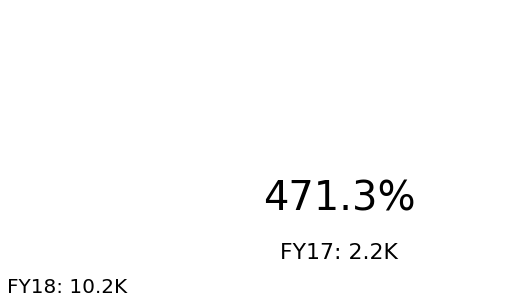

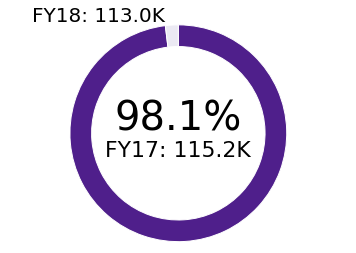

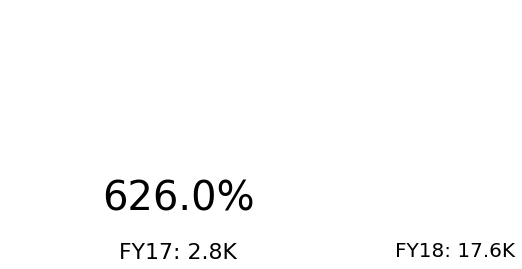

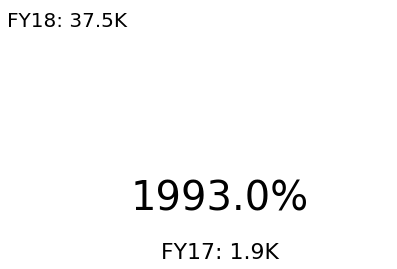

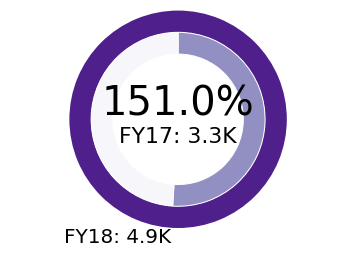

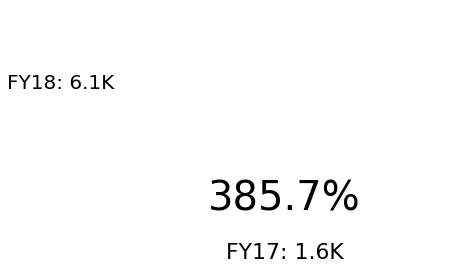

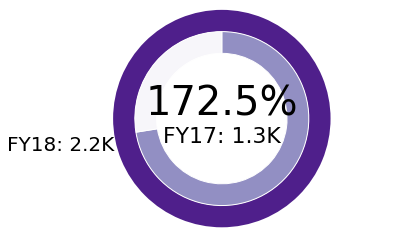

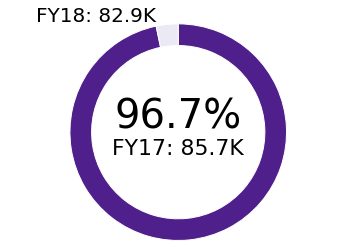

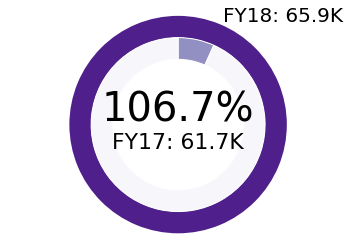

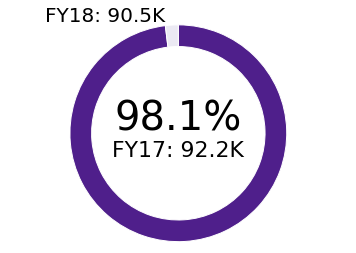

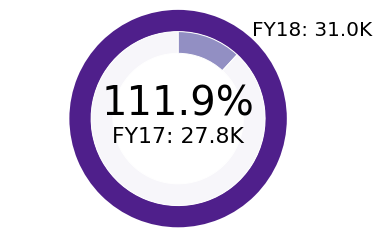

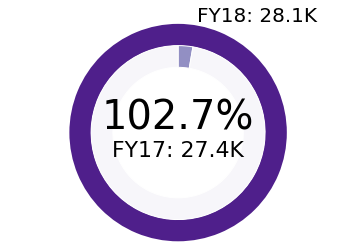

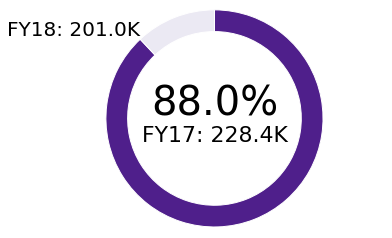

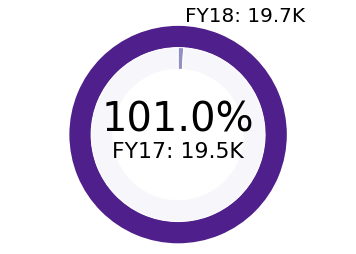

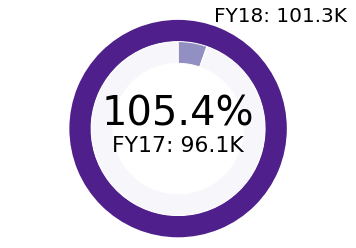

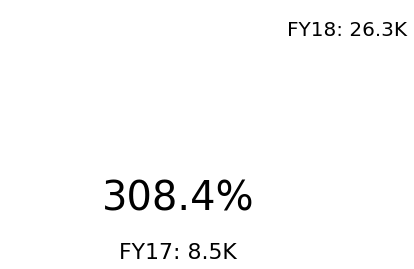

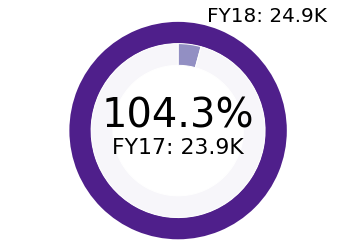

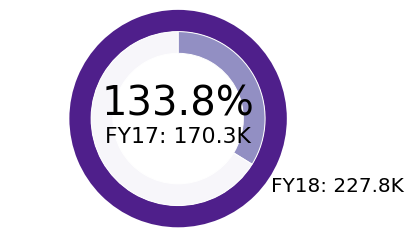

In [19]:
ring_data_routes.apply(create_radial_chart)